<a href="https://colab.research.google.com/github/Housenkan/ChallengeAluraTelecomX/blob/main/TelecomX_BR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracão

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json"

dados = pd.read_json(url)
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


#🔧 Transformação

In [18]:
customer_normalized = pd.json_normalize(dados['customer'])
phone_normalized = pd.json_normalize(dados['phone'])
internet_normalized = pd.json_normalize(dados['internet'])
account_normalized = pd.json_normalize(dados['account'])

dados_flat = dados.drop(columns=['customer', 'phone', 'internet', 'account'])
dados = pd.concat([dados_flat, customer_normalized, phone_normalized, internet_normalized, account_normalized], axis=1)
pd.set_option('display.max_columns', None)
display(dados)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [19]:
dados['Contas_diarias'] = (dados['Charges.Monthly'] / 30).round(2)

print("DataFrame 'dados' with the new 'Contas_diarias' column:")
display(dados)

DataFrame 'dados' with the new 'Contas_diarias' column:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [20]:
null_contador = dados.isnull().sum()
null_porcentagem = (null_contador / len(dados)) * 100
contador_vazio = dados.astype(str).apply(lambda x: x.str.strip() == '').sum()
vazio_porcentagem = (contador_vazio / len(dados)) * 100
summary_df = pd.DataFrame({
    'Nulos': null_contador,
    'Percentual de nulos': null_porcentagem,
    'Vazios': contador_vazio,
    'Percentual de vazios': vazio_porcentagem
})
summary_df_filtered = summary_df[(summary_df['Nulos'] > 0) | (summary_df['Vazios'] > 0)]
display(summary_df_filtered)

,Nulos,Percentual de nulos,Vazios,Percentual de vazios
Churn,0,0.0,224,3.082427
Charges.Total,0,0.0,11,0.151369


In [21]:
dados = dados[dados['Churn'].astype(str).str.strip() != '']


In [22]:
null_contador = dados.isnull().sum()
null_porcentagem = (null_contador / len(dados)) * 100
contador_vazio = dados.astype(str).apply(lambda x: x.str.strip() == '').sum()
vazio_porcentagem = (contador_vazio / len(dados)) * 100
summary_df = pd.DataFrame({
    'Nulos': null_contador,
    'Percentual de nulos': null_porcentagem,
    'Vazios': contador_vazio,
    'Percentual de vazios': vazio_porcentagem
})
summary_df_filtered = summary_df[(summary_df['Nulos'] > 0) | (summary_df['Vazios'] > 0)]
display(summary_df_filtered)

,Nulos,Percentual de nulos,Vazios,Percentual de vazios
Charges.Total,0,0.0,11,0.156183


In [23]:
empty_charges_rows = dados[dados['Charges.Total'].astype(str).str.strip() == '']
print("Linhas com valores vaziosna coluna 'Charges.Total':")
display(empty_charges_rows)

Linhas com valores vaziosna coluna 'Charges.Total':


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_diarias
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,1.87
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0.67
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,2.06
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0.66
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0.68
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0.85
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,2.44
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0.86
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,1.75
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,2.70


In [24]:
duplicate_rows = dados[dados.duplicated(keep=False)]
print("Linhas duplicadas no DataFrame:")
if duplicate_rows.empty:
    print("Sem linhas duplicadas.")
else:
    display(duplicate_rows)

Linhas duplicadas no DataFrame:
Sem linhas duplicadas.


In [25]:
dados = dados.replace({'Yes': 1, 'No': 0})
display(dados)

/tmp/ipython-input-3018848455.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados = dados.replace({'Yes': 1, 'No': 0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,0,1,0,1,1,0,One year,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,0,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,0,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,1,0,0,1,0,0,One year,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,1,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.26


In [26]:
dados = pd.DataFrame(dados)
dados.to_csv('dados_tratados.csv', index=False)

#📊 Carga e análise

In [27]:
dados_ordenados_mes = dados.sort_values(by='Charges.Monthly', ascending=True)
media_mes = round(dados['Charges.Monthly'].mean(), 2)
mediana_mes = round((len(dados['Charges.Monthly'])+1)/2)
print(f'O valor da mediana é {dados_ordenados_mes.iloc[mediana_mes]["Charges.Monthly"]} e sua posição é {mediana_mes} enquanto a média mensal é {media_mes}')

O valor da mediana é 70.35 e sua posição é 3522 enquanto a média mensal é 64.76


In [28]:
idade_publico = dados.groupby(dados_ordenados_mes['SeniorCitizen']).size().reset_index(name="Quantidade")
idade_publico['Porcentagem'] = round(idade_publico['Quantidade']/idade_publico['Quantidade'].sum()*100, 1)
idade_publico

,SeniorCitizen,Quantidade,Porcentagem
0,0,5901,83.8
1,1,1142,16.2


In [29]:
churn_publico = dados.groupby(dados_ordenados_mes['Churn']).size().reset_index(name = "Quantidade")
churn_publico['Porcentagem'] = round(churn_publico['Quantidade']/churn_publico['Quantidade'].sum()*100, 1)
churn_publico

,Churn,Quantidade,Porcentagem
0,0,5174,73.5
1,1,1869,26.5


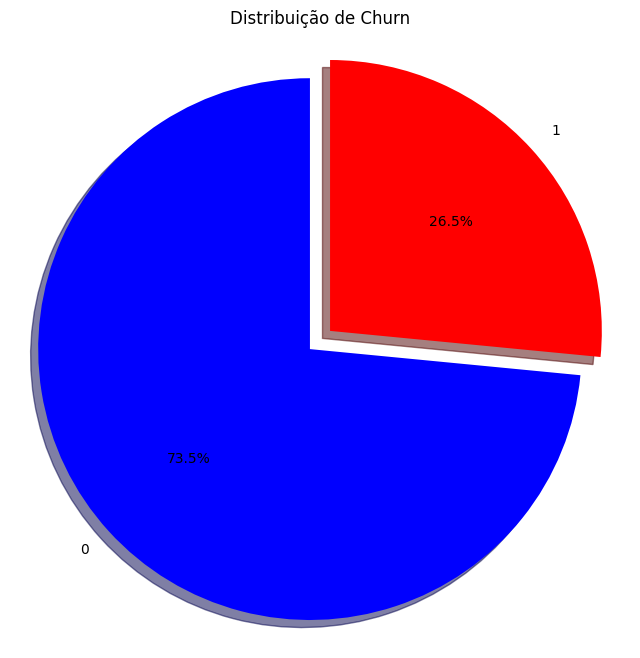

<Figure size 640x480 with 0 Axes>

In [54]:
labels = churn_publico['Churn']
sizes = churn_publico['Quantidade']
colors = ['blue', 'red']
explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Distribuição de Churn')
plt.axis('equal')
plt.show()
plt.savefig('DistribuiçãoChurn.png')

In [31]:
parceiros = dados.groupby(dados_ordenados_mes['Partner']).size().reset_index(name = "Quantidade")
parceiros['Porcentagem'] = round(parceiros['Quantidade']/parceiros['Quantidade'].sum()*100, 1)
parceiros

,Partner,Quantidade,Porcentagem
0,0,3641,51.7
1,1,3402,48.3


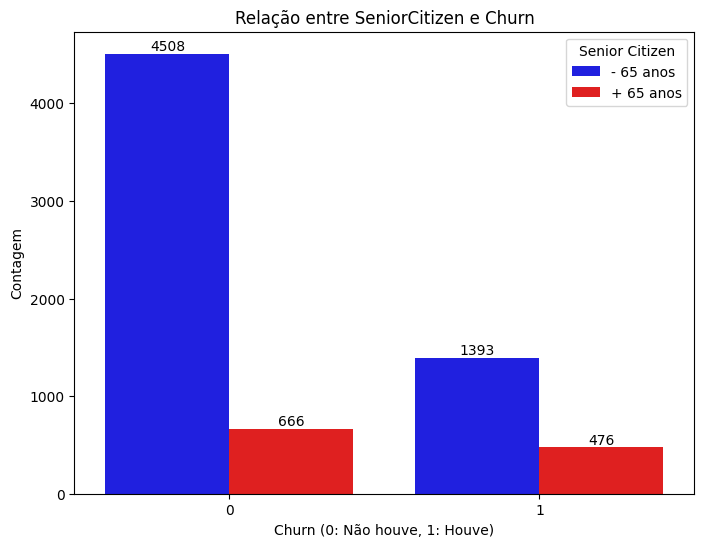

<Figure size 640x480 with 0 Axes>

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dados, x='Churn', hue='SeniorCitizen', palette=['blue', 'red'])
plt.title('Relação entre SeniorCitizen e Churn')
plt.xlabel('Churn (0: Não houve, 1: Houve)')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.legend(title='Senior Citizen', labels=['- 65 anos', '+ 65 anos'])
for container in ax.containers:
    ax.bar_label(container)

plt.show()
plt.savefig('IdadexChurn.png')

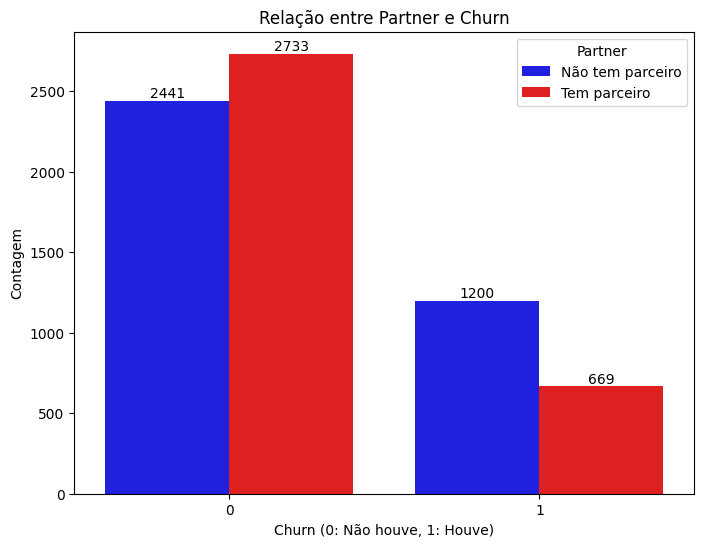

<Figure size 640x480 with 0 Axes>

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=dados, x='Churn', hue='Partner', palette=['blue', 'red'])
plt.title('Relação entre Partner e Churn')
plt.xlabel('Churn (0: Não houve, 1: Houve)')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
plt.legend(title='Partner', labels=['Não tem parceiro', 'Tem parceiro'])
for container in ax.containers:
    ax.bar_label(container)

plt.show()
plt.savefig('ParceirosxChurn.png')

In [43]:
dados_contratos = dados.groupby(dados_ordenados_mes['Contract']).size().reset_index(name = "Quantidade")
dados_contratos['Porcentagem'] = round(dados_contratos['Quantidade']/dados_contratos['Quantidade'].sum()*100, 1)
dados_contratos

,Contract,Quantidade,Porcentagem
0,Month-to-month,3875,55.0
1,One year,1473,20.9
2,Two year,1695,24.1


/tmp/ipython-input-1197993919.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=monthly_contract_data, x='Churn', palette=['blue', 'red'])


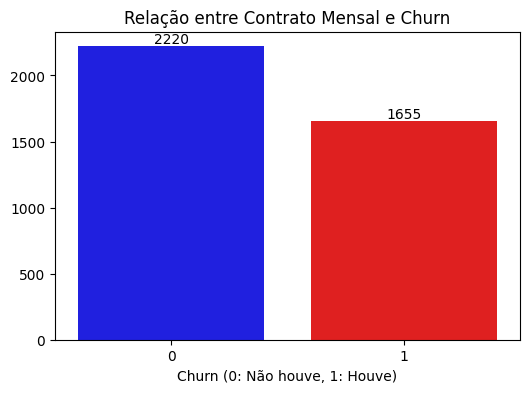

/tmp/ipython-input-1197993919.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=one_year_contract_data, x='Churn', palette=['blue', 'red'])


<Figure size 640x480 with 0 Axes>

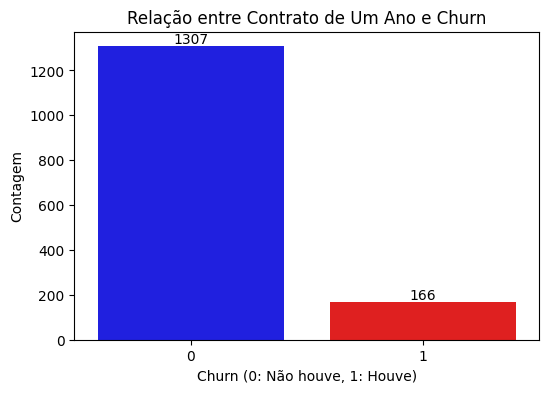

/tmp/ipython-input-1197993919.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=two_year_contract_data, x='Churn', palette=['blue', 'red'])


<Figure size 640x480 with 0 Axes>

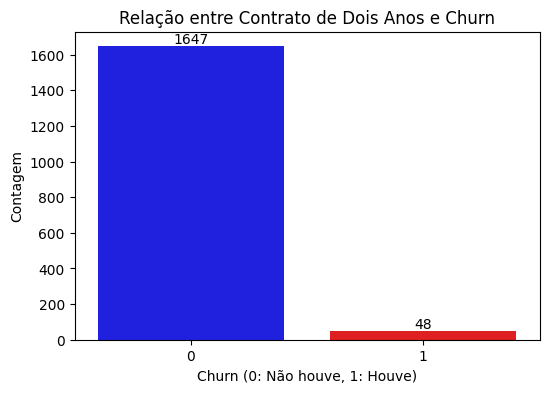

<Figure size 640x480 with 0 Axes>

In [55]:
monthly_contract_data = dados[dados['Contract'] == 'Month-to-month']

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=monthly_contract_data, x='Churn', palette=['blue', 'red'])
plt.title('Relação entre Contrato Mensal e Churn')
plt.xlabel('Churn (0: Não houve, 1: Houve)')
plt.ylabel('')
plt.xticks(ticks=[0, 1], labels=['0', '1'])
for container in ax.containers:
    ax.bar_label(container)

plt.show()
plt.savefig('ContratoMENSALxChurn.png')


one_year_contract_data = dados[dados['Contract'] == 'One year']


plt.figure(figsize=(6, 4))
ax = sns.countplot(data=one_year_contract_data, x='Churn', palette=['blue', 'red'])
plt.title('Relação entre Contrato de Um Ano e Churn')
plt.xlabel('Churn (0: Não houve, 1: Houve)')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['0', '1'])


for container in ax.containers:
    ax.bar_label(container)

plt.show()

plt.savefig('ContratoANUALxChurn.png')


two_year_contract_data = dados[dados['Contract'] == 'Two year']


plt.figure(figsize=(6, 4))
ax = sns.countplot(data=two_year_contract_data, x='Churn', palette=['blue', 'red'])
plt.title('Relação entre Contrato de Dois Anos e Churn')
plt.xlabel('Churn (0: Não houve, 1: Houve)')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['0', '1'])

for container in ax.containers:
    ax.bar_label(container)

plt.show()

plt.savefig('ContratoBIENALxChurn.png')

In [57]:
metodos_agrupados = dados.groupby(dados_ordenados_mes['PaymentMethod']).size().reset_index(name= 'Quantidade')
metodos_agrupados

,PaymentMethod,Quantidade
0,Bank transfer (automatic),1544
1,Credit card (automatic),1522
2,Electronic check,2365
3,Mailed check,1612


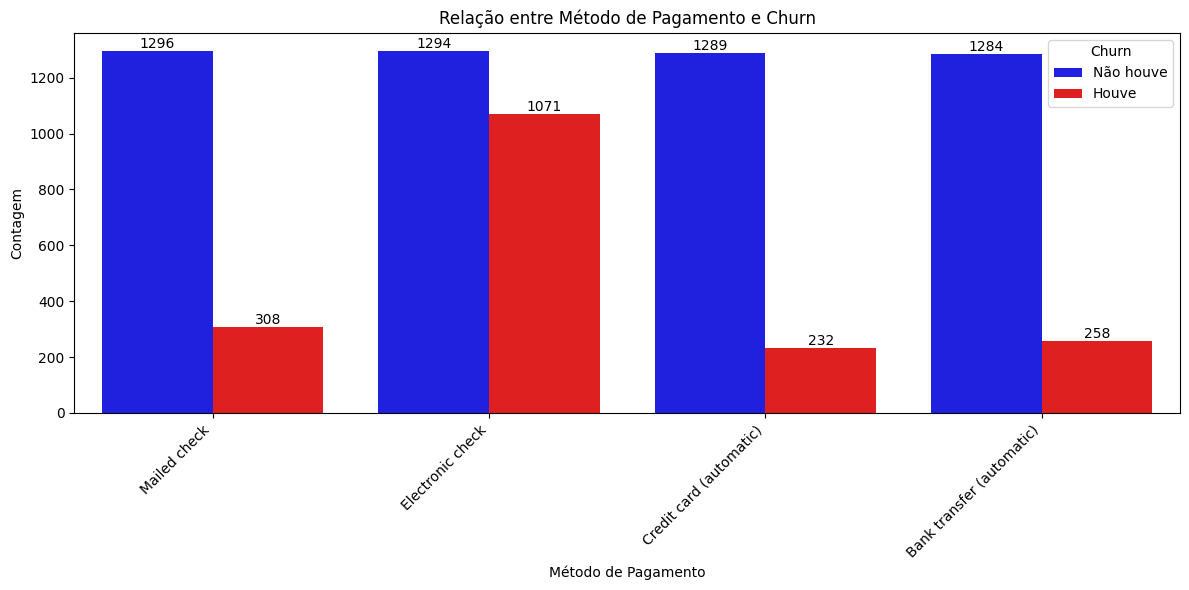

In [67]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=dados, x='PaymentMethod', hue='Churn', palette=['blue', 'red'])
plt.title('Relação entre Método de Pagamento e Churn')
plt.xlabel('Método de Pagamento')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')

for container in ax.containers:
    ax.bar_label(container)

plt.legend(title='Churn', labels=['Não houve', 'Houve'])

plt.tight_layout()
plt.show()

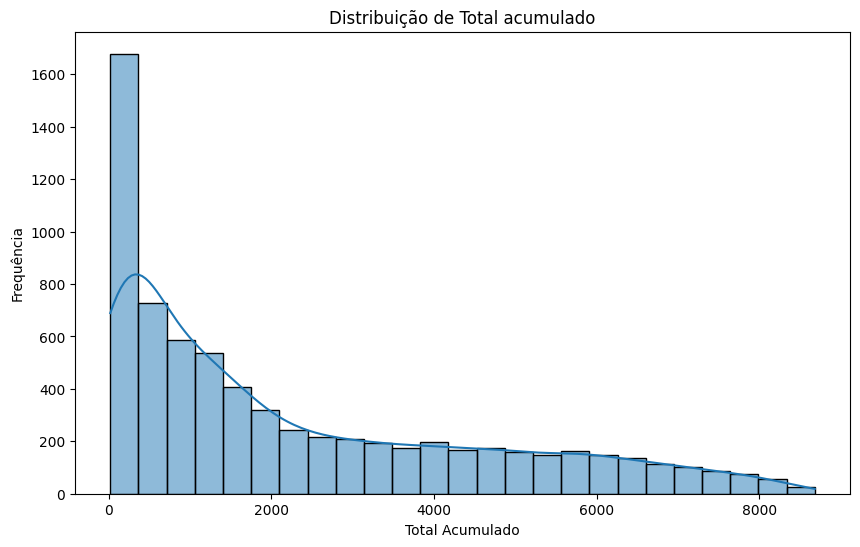

<Figure size 640x480 with 0 Axes>

In [62]:
dados['Charges.Total'] = pd.to_numeric(dados['Charges.Total'], errors='coerce')

dados.dropna(subset=['Charges.Total'], inplace=True)


plt.figure(figsize=(10, 6))
sns.histplot(data=dados, x='Charges.Total', kde=True)
plt.title('Distribuição de Total acumulado')
plt.xlabel('Total Acumulado')
plt.ylabel('Frequência')
plt.show()

plt.savefig('Totalacumulado.png')

#📄Relatorio Final

## Relatório de Extração e Transformação de Dados

Este relatório descreve o passo a passo das etapas de extração e transformação realizadas nos dados.

### Extração

Na seção de Extração, o objetivo foi carregar os dados iniciais para análise.

*   **Célula de Código (ID: 1--uPM88l7JH)**:
    *   **Ação**: Importação das bibliotecas `pandas`, `matplotlib.pyplot` e `seaborn`.
    *   **Ação**: Definição do URL para o arquivo JSON (`TelecomX_Data.json`).
    *   **Ação**: Leitura dos dados do URL utilizando `pd.read_json()` e armazenamento no DataFrame `dados`.
    *   **Ação**: Exibição das primeiras linhas do DataFrame `dados` para inspeção inicial.

### Transformação

Na seção de Transformação, diversas operações foram realizadas para limpar, estruturar e preparar os dados para análise.

*   **Célula de Código (ID: ubzYODpRjODI)**:
    *   **Ação**: Normalização das colunas aninhadas (`customer`, `phone`, `internet`, `account`) utilizando `pd.json_normalize()`.
    *   **Ação**: Criação de DataFrames separados para cada coluna normalizada: `customer_normalized`, `phone_normalized`, `internet_normalized`, `account_normalized`.
    *   **Ação**: Remoção das colunas aninhadas originais do DataFrame `dados` para criar `dados_flat`.
    *   **Ação**: Concatenação horizontal (`axis=1`) do `dados_flat` com os DataFrames normalizados para criar o DataFrame `dados` unificado.
    *   **Ação**: Configuração da opção de exibição do pandas para mostrar todas as colunas (`pd.set_option('display.max_columns', None)`).
    *   **Ação**: Exibição do DataFrame `dados` completo após a normalização e concatenação.

*   **Célula de Código (ID: ph-KsakOI1jD)**:
    *   **Ação**: Criação de uma nova coluna chamada `Contas_diarias`.
    *   **Ação**: Cálculo dos valores para a coluna `Contas_diarias` dividindo os valores da coluna `Charges.Monthly` por 30 e arredondando para duas casas decimais.
    *   **Ação**: Exibição do DataFrame `dados` com a nova coluna `Contas_diarias`.

*   **Célula de Código (ID: GlcITdRV5AUF)**:
    *   **Ação**: Cálculo da contagem e percentual de valores nulos (`isnull().sum()`) para cada coluna do DataFrame `dados`.
    *   **Ação**: Cálculo da contagem e percentual de valores vazios (`astype(str).apply(lambda x: x.str.strip() == '').sum()`) para cada coluna do DataFrame `dados`.
    *   **Ação**: Criação de um DataFrame resumo (`summary_df`) com as contagens e percentuais de nulos e vazios.
    *   **Ação**: Filtragem do DataFrame resumo (`summary_df_filtered`) para mostrar apenas as colunas que possuem contagem de nulos ou vazios maior que zero.
    *   **Ação**: Exibição do DataFrame `summary_df_filtered`.

*   **Célula de Código (ID: K4Qo9_vVPU_W)**:
    *   **Ação**: Identificação das linhas no DataFrame `dados` onde a coluna 'Churn' contém valores vazios ('').
    *   **Ação**: Exibição das linhas identificadas com valores vazios na coluna 'Churn'.

*   **Célula de Código (ID: klnMjAIV1ALI)**:
    *   **Ação**: Identificação das linhas no DataFrame `dados` onde a coluna 'Charges.Total' contém valores vazios ('').
    *   **Ação**: Exibição das linhas identificadas com valores vazios na coluna 'Charges.Total'.

*   **Célula de Código (ID: KLA_chLo43Mi)**:
    *   **Ação**: Identificação de linhas duplicadas no DataFrame `dados` utilizando o método `duplicated(keep=False)`.
    *   **Ação**: Exibição das linhas duplicadas encontradas ou uma mensagem indicando que não há duplicatas.

*   **Célula de Código (ID: bsm-WTLjmHvt)**:
    *   **Ação**: Substituição global dos valores "Yes" por 1 e "No" por 0 em todo o DataFrame `dados` utilizando o método `replace()`.
    *   **Ação**: Exibição das primeiras linhas do DataFrame `dados` após a substituição.

Este relatório resume as principais ações realizadas nas etapas de extração e transformação dos seus dados.